In [ ]:
import nltk
from nltk.tokenize import *
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#sample reviews
competitors_reviews = [
    "I've been a loyal Spotify user for years, but I recently tried out Apple Music, and I have to say, I'm impressed. The sound quality is excellent, and I love the curated playlists and radio stations.",
    "As a long-time Apple Music subscriber, I decided to give Spotify a try, and I have to admit, I'm hooked. The personalized playlists and recommendations are much better, and I love the social features like collaborative playlists.",
    "Both Spotify and Apple Music have their strengths and weaknesses, but overall, I prefer Spotify. The user interface is more intuitive, and I find it easier to discover new music on Spotify.",
    "I've been using Apple Music for a while now, and I have no complaints. The integration with my Apple devices is seamless, and I appreciate the exclusive releases and live radio shows.",
    "I recently switched from Spotify to Apple Music, and I couldn't be happier. The audio quality is noticeably better, and I love the curated playlists tailored to my taste.",
    "Spotify wins hands down for me. The vast library of songs, podcasts, and playlists is unmatched, and I love how easy it is to share music with friends. Apple Music just doesn't compare.",
    "I've tried both Spotify and Apple Music, and while they're both great services, I prefer Apple Music. The interface is cleaner, and I find it easier to organize my library and create playlists.",
    "I'm a die-hard Spotify fan, but I have to admit, Apple Music has some nice features too. The integration with Siri and HomePod is convenient, and I appreciate the ability to watch music videos.",
    "I've been using Apple Music since it launched, and I have no plans to switch. The exclusive content and early access to new releases make it worth the subscription fee.",
    "It's a tough call between Spotify and Apple Music, but I ultimately prefer Spotify. The social features and collaborative playlists make it more fun to use, and I find the personalized recommendations more accurate.",
    "I've been a loyal Spotify user for years, but I recently tried out Apple Music, and I have to say, I'm impressed. The sound quality is excellent, and I love the curated playlists and radio stations.",
    "As a long-time Apple Music subscriber, I decided to give Spotify a try, and I have to admit, I'm hooked. The personalized playlists and recommendations are much better, and I love the social features like collaborative playlists.",
    "Both Spotify and Apple Music have their strengths and weaknesses, but overall, I prefer Spotify. The user interface is more intuitive, and I find it easier to discover new music on Spotify.",
    "I've been using Apple Music for a while now, and I have no complaints. The integration with my Apple devices is seamless, and I appreciate the exclusive releases and live radio shows.",
    "I recently switched from Spotify to Apple Music, and I couldn't be happier. The audio quality is noticeably better, and I love the curated playlists tailored to my taste.",
    "Spotify wins hands down for me. The vast library of songs, podcasts, and playlists is unmatched, and I love how easy it is to share music with friends. Apple Music just doesn't compare.",
    "I've tried both Spotify and Apple Music, and while they're both great services, I prefer Apple Music. The interface is cleaner, and I find it easier to organize my library and create playlists.",
    "I'm a die-hard Spotify fan, but I have to admit, Apple Music has some nice features too. The integration with Siri and HomePod is convenient, and I appreciate the ability to watch music videos.",
    "I've been using Apple Music since it launched, and I have no plans to switch. The exclusive content and early access to new releases make it worth the subscription fee.",
    "It's a tough call between Spotify and Apple Music, but I ultimately prefer Spotify. The social features and collaborative playlists make it more fun to use, and I find the personalized recommendations more accurate."
]


In [ ]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
  tokens=word_tokenize(text.lower())
  tokens=[token for token in tokens if token.isalnum()]
  tokens=[token for token in tokens if token not in stop_words]
  tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return tokens

In [ ]:
competitors=["Spotify","Apple Music"]

In [ ]:
sid=SentimentIntensityAnalyzer()
sentiment_scores,key_phrases=defaultdict(list),defaultdict(list)

In [ ]:
for review in competitors_reviews:
  tokens=preprocess_text(review)
  sentiment_score=sid.polarity_scores(' '.join(tokens))['compound']
  for competitor in competitors:
    if competitor.lower() in review.lower():
      sentiment_scores[competitor].append(sentiment_score)
      sentences=sent_tokenize(review)
      for sentence in sentences:
        if competitor.lower() in sentence.lower():
          key_phrases[competitor].extend(preprocess_text(sentence))

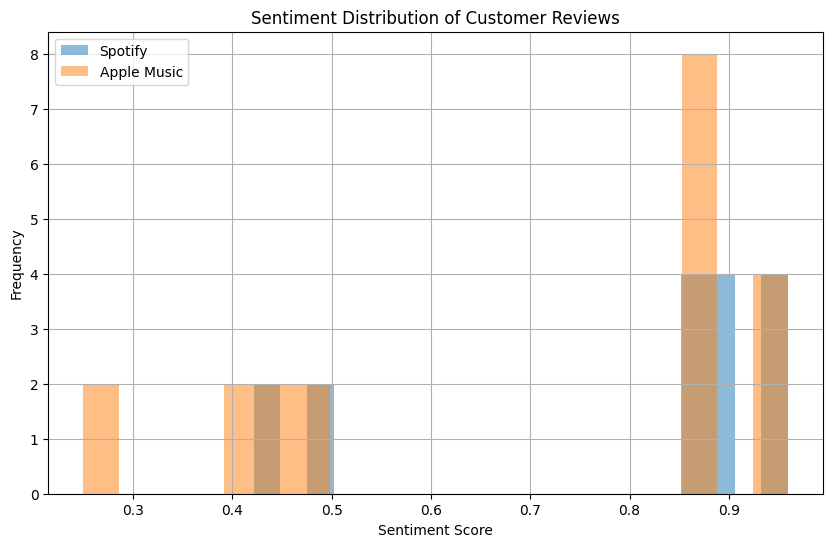

In [ ]:
plt.figure(figsize=(10,6))
for competitor,scores in sentiment_scores.items():
  plt.hist(scores,bins=20,alpha=0.5,label=competitor)
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

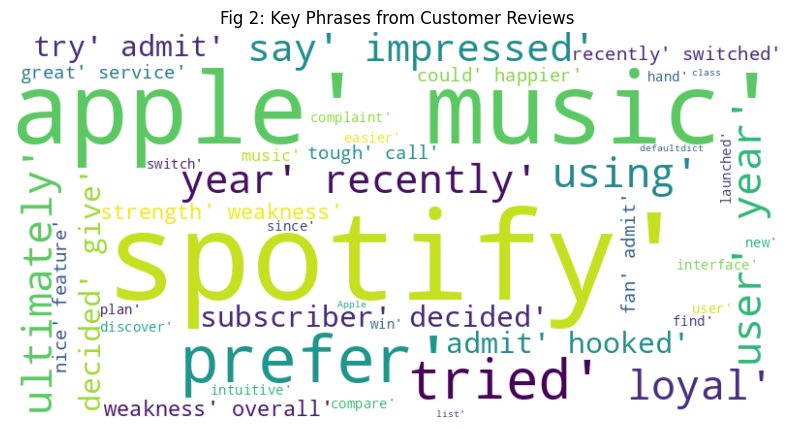

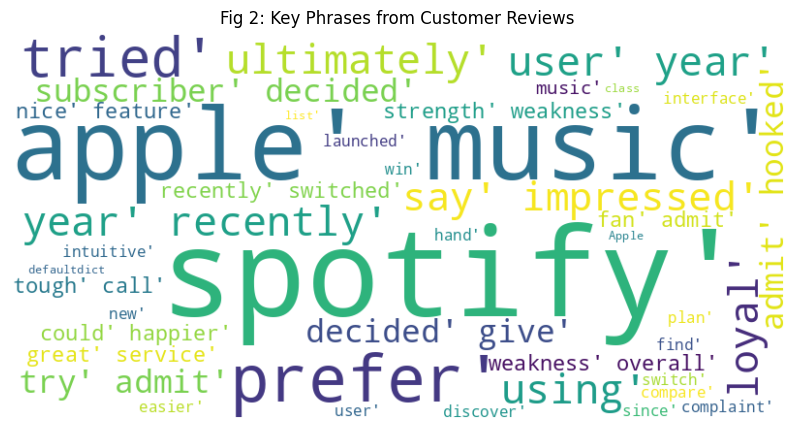

In [ ]:
#plot word cloud for key phrases
from wordcloud import WordCloud
for i,(competitor,phrases) in enumerate(key_phrases.items()):
  key_phrases_text=' '.join(phrases)
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(str(key_phrases))

  plt.figure(figsize=(10,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.title('Fig 2: Key Phrases from Customer Reviews')
  plt.axis('off')
  plt.show()